# <b>Kaggle Heart Disease Project </b>
# December 2019

Data taken from site : https://www.kaggle.com/ronitf/heart-disease-uci and additional descriptions for the features is taken from https://archive.ics.uci.edu/ml/datasets/heart+Disease  

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. 

Columns descriptions:


- A. <a href='age :'> age :</a>	 in years
- B. <a href='age :'> sex :</a>	 (1 = male; 0 = female)
- C. <a href='age :'> cp :</a>	chest pain type experienced defined as (0-4) 
        - (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- D. <a href='age :'> trestbps:</a>	resting blood pressure (in mm Hg on admission to the hospital)
- E. <a href='age :'> chol :</a>  serum cholestoral measurement in mg/dL
- F. <a href='age :'> fbs :</a>	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- G. <a href='age :'> restecg :</a>	resting electrocardiographic measurement defined as 
        - (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- H. <a href='age :'> thalach :</a>	 maximum heart rate achieved
- I. <a href='age :'> exang :</a>	exercise induced angina (1 = yes; 0 = no) 
- J. <a href='age :'> oldpeak :</a>	 ST depression induced by exercise relative to rest. 'ST' relates to isoelectric period when the ventricles are in between depolarization and repolarization on the ECG plot. ST depression can be associated with myocardial infarction. 
- K. <a href='age :'> slope :</a>	 the slope of the peak exercise ST segment defined as
        - (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- L. <a href='age :'> ca :</a>	number of major vessels (0-3) colored by flouroscopy
- M. <a href='age :'> tha :</a>	A blood disorder called thalassemia defined as 
        - 3 = normal; 6 = fixed defect; 7 = reversable defect
- N. <a href='age :'> target : </a>	presence of heart disease (1 = presence of heart disease or 0 = presence of heart disease)







We can divide the features above into two groups: quantitative and categorical

- Quantitative features: Age, trestbps, chol, thalach, oldpeak

- Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal

# <b>Exploratory Data Analysis </b> 


In [122]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
import statistics as st
import warnings
import nbconvert
warnings.filterwarnings('ignore')

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks", color_codes=True)







In [123]:
heart_df = pd.read_csv('heart.csv')

## <b>Basic Details of the Dataframe </b> 

In [87]:
# view shape of the dataset includes how many total columns and rows
heart_df.shape

(303, 14)

In [88]:
#view the top of dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
# view tail of dataset
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [90]:
# view the count, mean, std dev, min/max and 25%, 50%, and 75% values for each column of dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Conclusions from table above: 
 - 303 incidents included in this study. 
 - Age ranges from 29 to 77, with a mean age is ~54 years old.
 - There are more males than females.
 - Resting blood pressure ranges from 94 to 200, with a resting blood pressure mean of ~131.62.
 - There are more people who have fasting blood sugar (FBS) lower than 120 mg/dl.
 - Serum cholestoral ranges from 126 to 564, with a serum cholesterol mean level is ~246.3 mg/dl.
 - Maximum heart rate ranges from 71 to 202, with a maximum heart rate mean of ~149.65. 
 - Most patients did not experience angina after exercise.
 - Oldpeak ranges from 0 to 6.2, with a mean of ~1.04.
 - Slope ranges from 0 to 2, with a mean of ~1.40.
 - ca ranges from 0 to 4. However, there is 5 incidents that are marked as a rating of 4 which may be an error since the Heart disease description   mentions the highest range of 3.
 - thal ranges from 0 to 3 and has a mean of ~2.3.
 - Our target mean is ~0.54.

In [91]:
# get info on dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# <b>Missing Values Detection and Removal in Dataframe </b> 


In [92]:
# determine if there are any empty spaces in dataframe
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Conclusion: 
 - No empty values

# <b>Duplication and Outlier Detection and Removal in Dataframe </b>


In [93]:
# check for duplicate observations- incident 163 and 164 are identical, I will remove copy(164) and keep original (163)
heart_df[heart_df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [94]:
#identifies which row is duplicated
heart_df[heart_df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [95]:
# drop duplicate observation
heart_df = heart_df.drop_duplicates()

In [96]:
# verify duplicate was removed
heart_df[heart_df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [97]:
# view updated shape; The total row number should be 302 rows after removal of duplicate 
heart_df.shape

(302, 14)

- Conclusion: 
 - Incident 164 was a duplication and was removed from dataframe. 
 - To confirm removal of duplication, we can view the updated shape which has a total of 302 incidents.

# <b>Check for Outliers in Dataframe </b> 


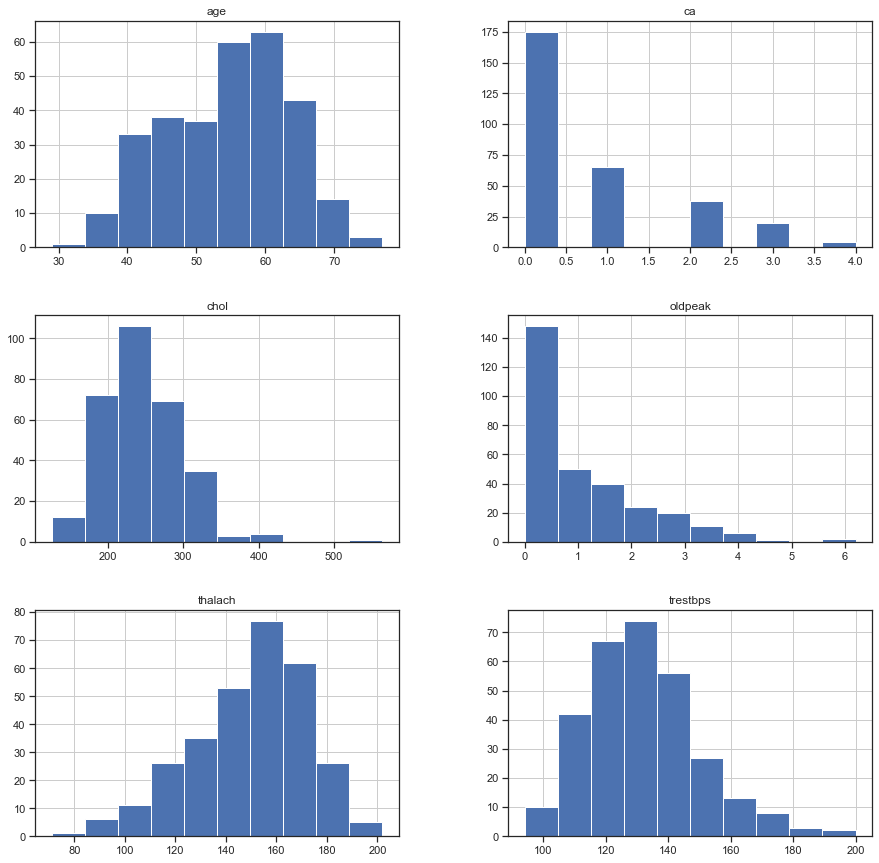

In [98]:
plt.rcParams['figure.figsize']= (15,15) 

heart_df[[ 'age','trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].hist();

- Conclusions:
  - Age: has a normal distribution to use as comparison to other features. 

  - Chol: is quite close to having a a normal distribution. However, it is possible to notice a high value (500) that can be a possible outlier.
  
  - Thalach: the maximum heart rate achieved seems to follow a right-skewed distribution (non-normal).
  
  - ca: the number of major vessels colored by flouroscopy has a range of (0-3), but there were some incidents labeled as 4. These five incidents may be outliers.

  - Oldpeak: It seems to follow a left-skewed distribution (lognormal) and 2 values at 5 and 6 that could be outliers.

  - Trestbps: Resting blood pressure appears to follow a normal distribution.

- I will check if any of the values above are considered outliers by using boxplots. 

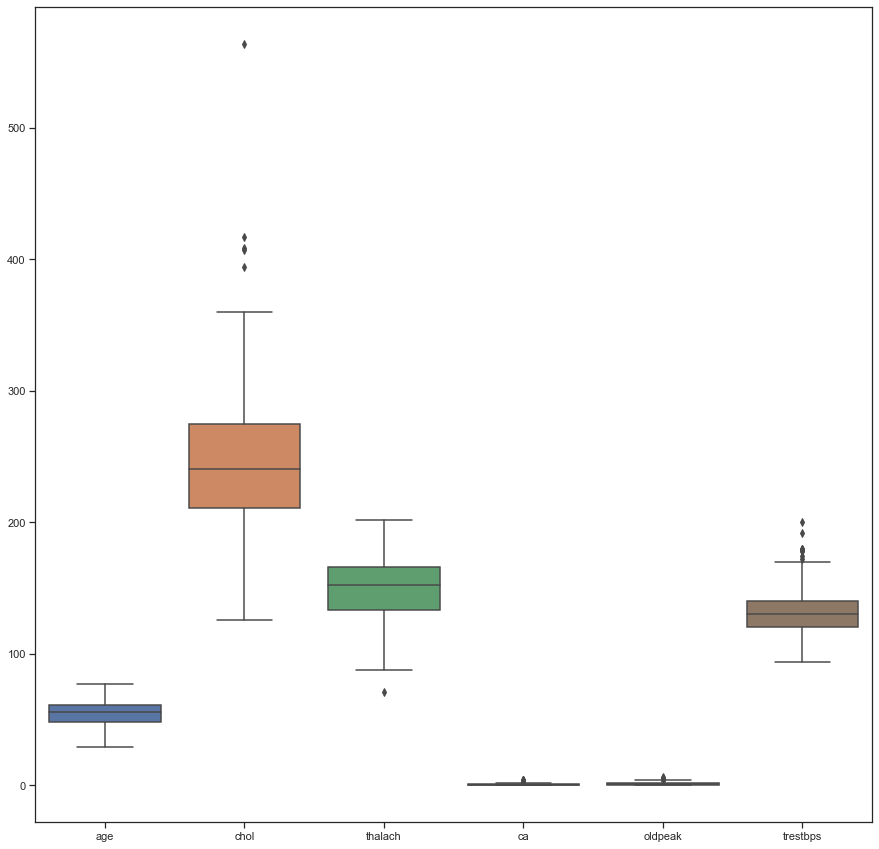

In [99]:
#Let's check outliers presence using boxplots
sns.boxplot(data = heart_df[['age','chol', 'thalach', 'ca','oldpeak', 'trestbps']])



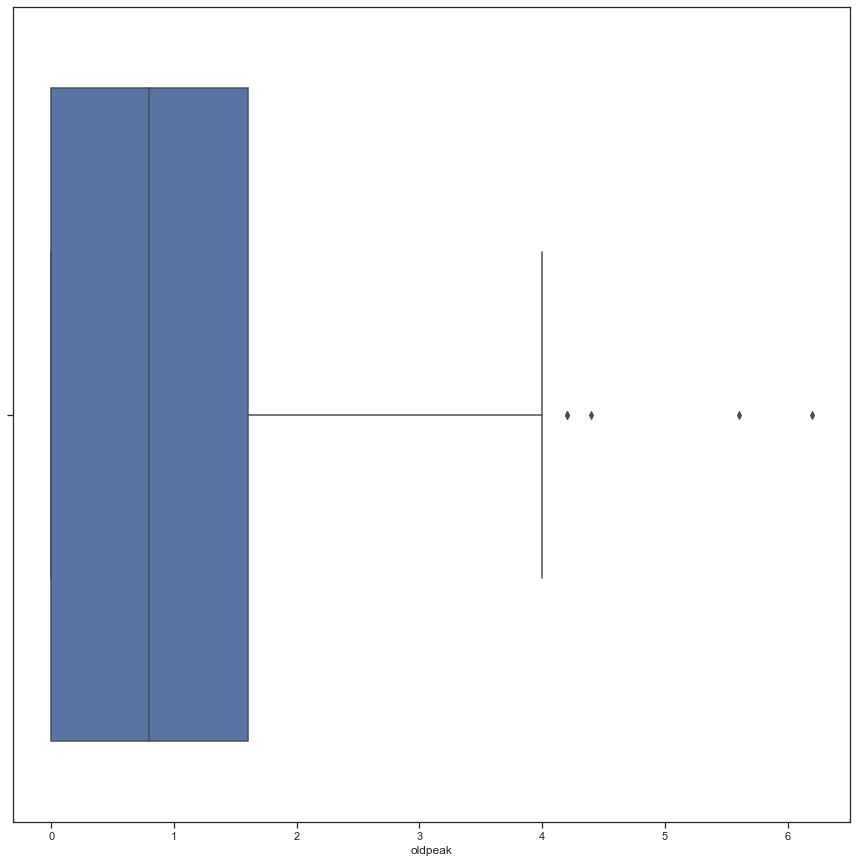

In [100]:
sns.boxplot(x='oldpeak', data=heart_df, orient='h')


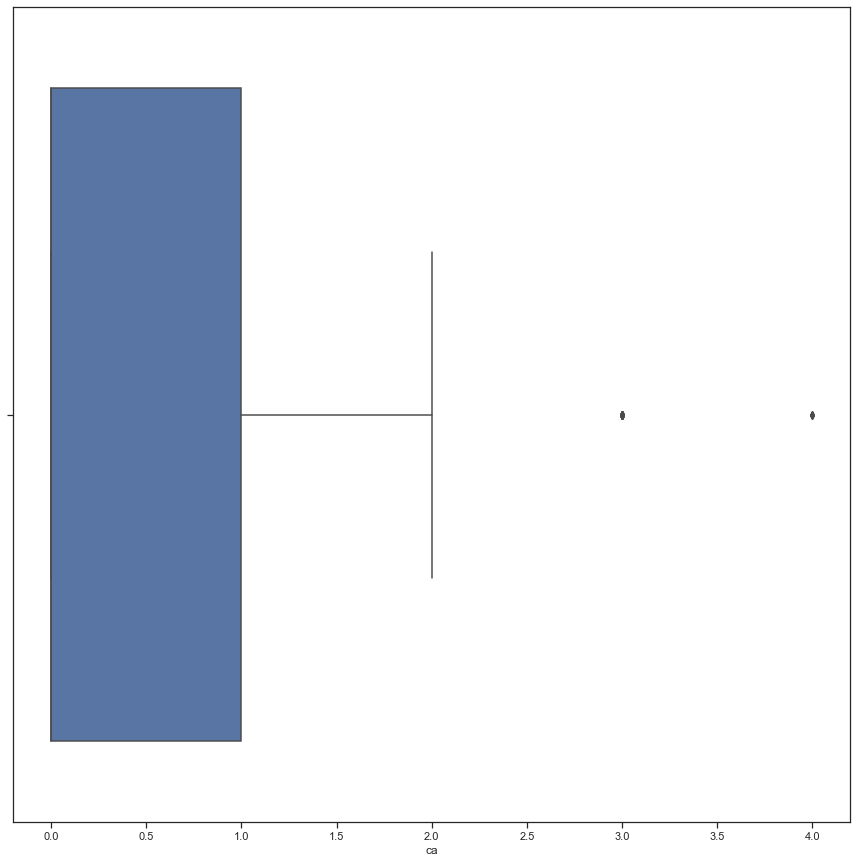

In [101]:
sns.boxplot(x='ca', data=heart_df, orient='h')


- Conclusion: 
 - Based on the boxplots above, it confirms that there are some outliers present in data, which I had noticed after viewing them in the histogram plots. I have decided to remove the outliers in chol and in ca.
 

In [102]:
heart_df_new = heart_df[(heart_df['chol']< 500) & (heart_df['ca']< 4)]
heart_df_new.shape

(297, 14)

In [121]:
heart_df_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- Conclusion: 
 - After removing the outliers in chol and in ca, the number of incidents went from 303 to 297, which is the removal of 6 incidents.

# <b>Feature Comparisons in Dataframe </b> 

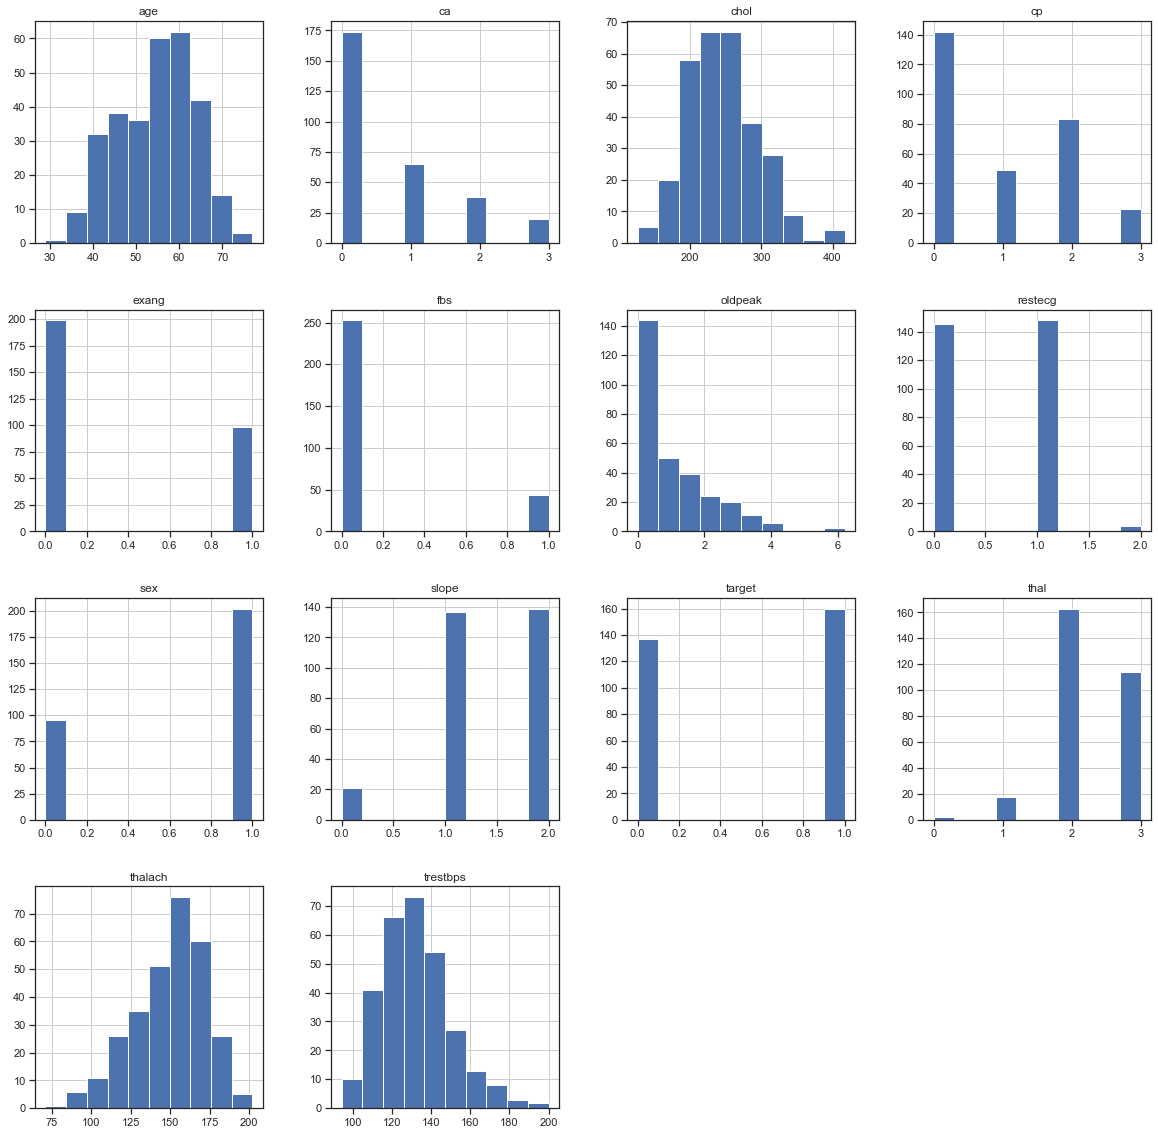

In [103]:
# plot histogram of dataframe
heart_df_new.hist(figsize=(20,20));

In [104]:
#Find out how many people do (1) and don't (0) exhibit heart disease
heart_df_new['target'].value_counts()

1    160
0    137
Name: target, dtype: int64

In [105]:
#Find out how many men (1) and women (0) 
heart_df_new['sex'].value_counts()

1    202
0     95
Name: sex, dtype: int64

In [106]:
#Distribution of heart disease between men (1) and women (0)
heart_df_new.groupby(['sex', 'target'])['sex'].count()

sex  target
0    0          24
     1          71
1    0         113
     1          89
Name: sex, dtype: int64

In [107]:
total = len(heart_df_new['sex'])
male = sum(heart_df_new['sex'] == 1)
female = sum(heart_df_new['sex'] == 0)
total



297

In [108]:
percent_men= (male/total)*100
percent_women=(female/total)*100

print(percent_women)
print(percent_men)

31.986531986531986
68.01346801346801


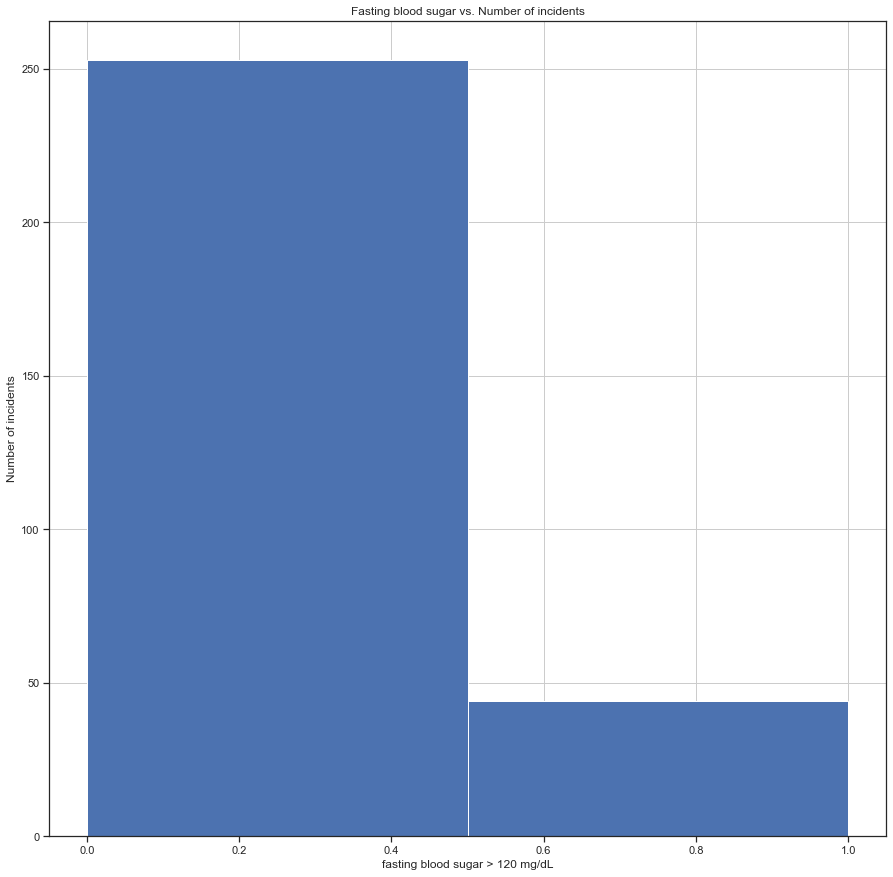

In [109]:
x = heart_df_new.fbs
plt.hist(x,bins = 2)
plt.xlabel("fasting blood sugar > 120 mg/dL")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Fasting blood sugar vs. Number of incidents')
plt.show()



In [110]:
# number of incidents that don't have a fasting blood sugar greater than 120mg/dL
fbs_0= sum(x==0)
fbs_0


253

In [111]:
# number of incidents that have a fasting blood sugar greater than 120mg/dL. 
fbs_1= sum(x==1)
fbs_1


44

- Conclusion: 
 - Of the 95 female patients, 71 have heart disease and 24 do not have heart disease. 
 - Of the 202 male patients, 89 have heart disease and 113 do not have heart disease. 
 - It appears that ~68% of men suffer from heart disease in comparison to females which is ~32%. 
 - More men than women have been included in this study.


- Conclusion of the fasting blood sugar, 0 means fasting blood sugar was not more than 120 mg/dl. It appears that 253 people had a fasting blood sugar level less than 120mg/dL and only 44 people had a fasting blood sugar level higher than 120mg/dL.It appears that fsb has no impact on having heart disease. I will need to test further to confirm my conclusions.


# <b>My Observations about Feature Relationship with Target in Dataframe </b>


Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

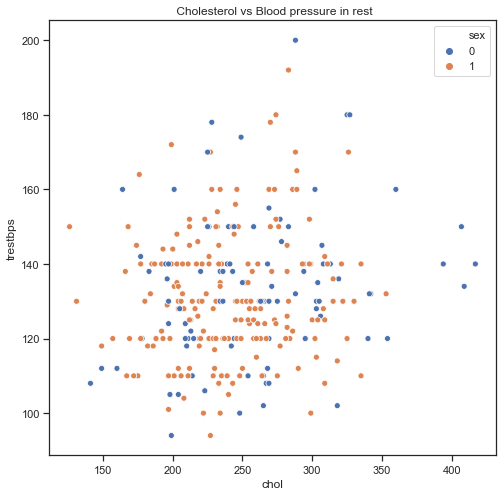

In [112]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=heart_df_new)
plt.title(' Cholesterol vs Blood pressure in rest')

- Conclusion: 
 - There was no presence of separate clusters as the serum cholesterol levels or resting blood pressure increases. 

Text(0.5, 1.0, 'Age vs Cholesterol')

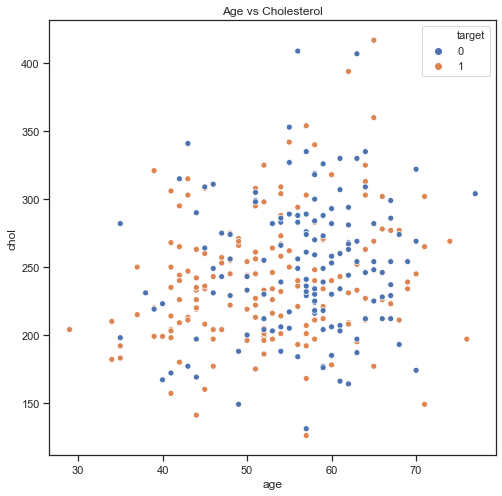

In [113]:
sns.scatterplot(x='age', y='chol', hue='target', data = heart_df_new)
plt.title('Age vs Cholesterol')

- Conclusions: 
 - The highest density of the presence of heart disease represented by blue dots occurs in the range of serum cholesterol levels between 200-300 mg/dl and between the ages of 50 - 60. 


# <b>Separating values by Genders </b> 


In [114]:
heart_female=heart_df_new[heart_df_new.sex==0]
heart_female=heart_female.reset_index()
heart_female.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [115]:
heart_male=heart_df_new[heart_df_new.sex==1]
heart_male=heart_male.reset_index()
heart_male.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


## Conclusions
- I separated values by the genders as a comparison. 

In [116]:
# I use the Correalation Matrix here understand the degree of association between the features.
heart_df_new.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.083035,-0.065925,0.294691,0.185768,0.132048,-0.108174,-0.397342,0.100344,0.198148,-0.158937,0.369487,0.061014,-0.229524
sex,-0.083035,1.000000,-0.050062,-0.063643,-0.173565,0.042146,-0.070053,-0.047775,0.143497,0.109087,-0.038084,0.086967,0.217105,-0.287036
cp,-0.065925,-0.050062,1.000000,0.047752,-0.094081,0.109508,0.036169,0.287586,-0.386488,-0.146330,0.111870,-0.223416,-0.159570,0.425358
trestbps,0.294691,-0.063643,0.047752,1.000000,0.157286,0.179427,-0.120636,-0.049409,0.067633,0.198999,-0.128978,0.100795,0.069598,-0.145789
chol,0.185768,-0.173565,-0.094081,0.157286,1.000000,0.017997,-0.130037,-0.009804,0.078803,0.036726,0.019915,0.146571,0.078601,-0.100687
fbs,0.132048,0.042146,0.109508,0.179427,0.017997,1.000000,-0.074128,-0.002047,0.009705,0.008506,-0.053468,0.143802,-0.040677,-0.013379
restecg,-0.108174,-0.070053,0.036169,-0.120636,-0.130037,-0.074128,1.000000,0.037294,-0.060959,-0.050923,0.083244,-0.113269,-0.003379,0.127977
thalach,-0.397342,-0.047775,0.287586,-0.049409,-0.009804,-0.002047,0.037294,1.000000,-0.375010,-0.341322,0.381868,-0.262586,-0.092476,0.417164
exang,0.100344,0.143497,-0.386488,0.067633,0.078803,0.009705,-0.060959,-0.375010,1.000000,0.289534,-0.254525,0.142674,0.206192,-0.427991
oldpeak,0.198148,0.109087,-0.146330,0.198999,0.036726,0.008506,-0.050923,-0.341322,0.289534,1.000000,-0.578132,0.295813,0.211900,-0.431618


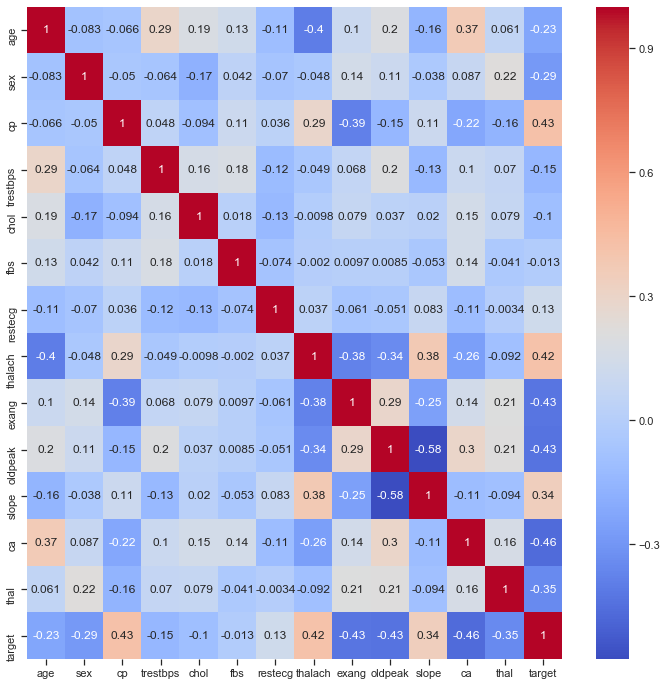

In [117]:
#plot the correlation matrix as a heatmap
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(heart_df_new.corr(), annot = True, cmap ='coolwarm')

- Conclusions:
  - The values show the correlation score between the row and column at each point. Values will range up to from 1 (very strong positve correlation) to -1 (very strong negative correlation, or 0 (no relationship). 
  - I find no feature that has a significant correlation with the target value. 
  - Some features have a lower positive correlation with the target value, which includes the features cp, thalach, and slope. 
  - Some features have a negative correlation with the target value, which includes the features exang, oldpeak, ca, and thal. 


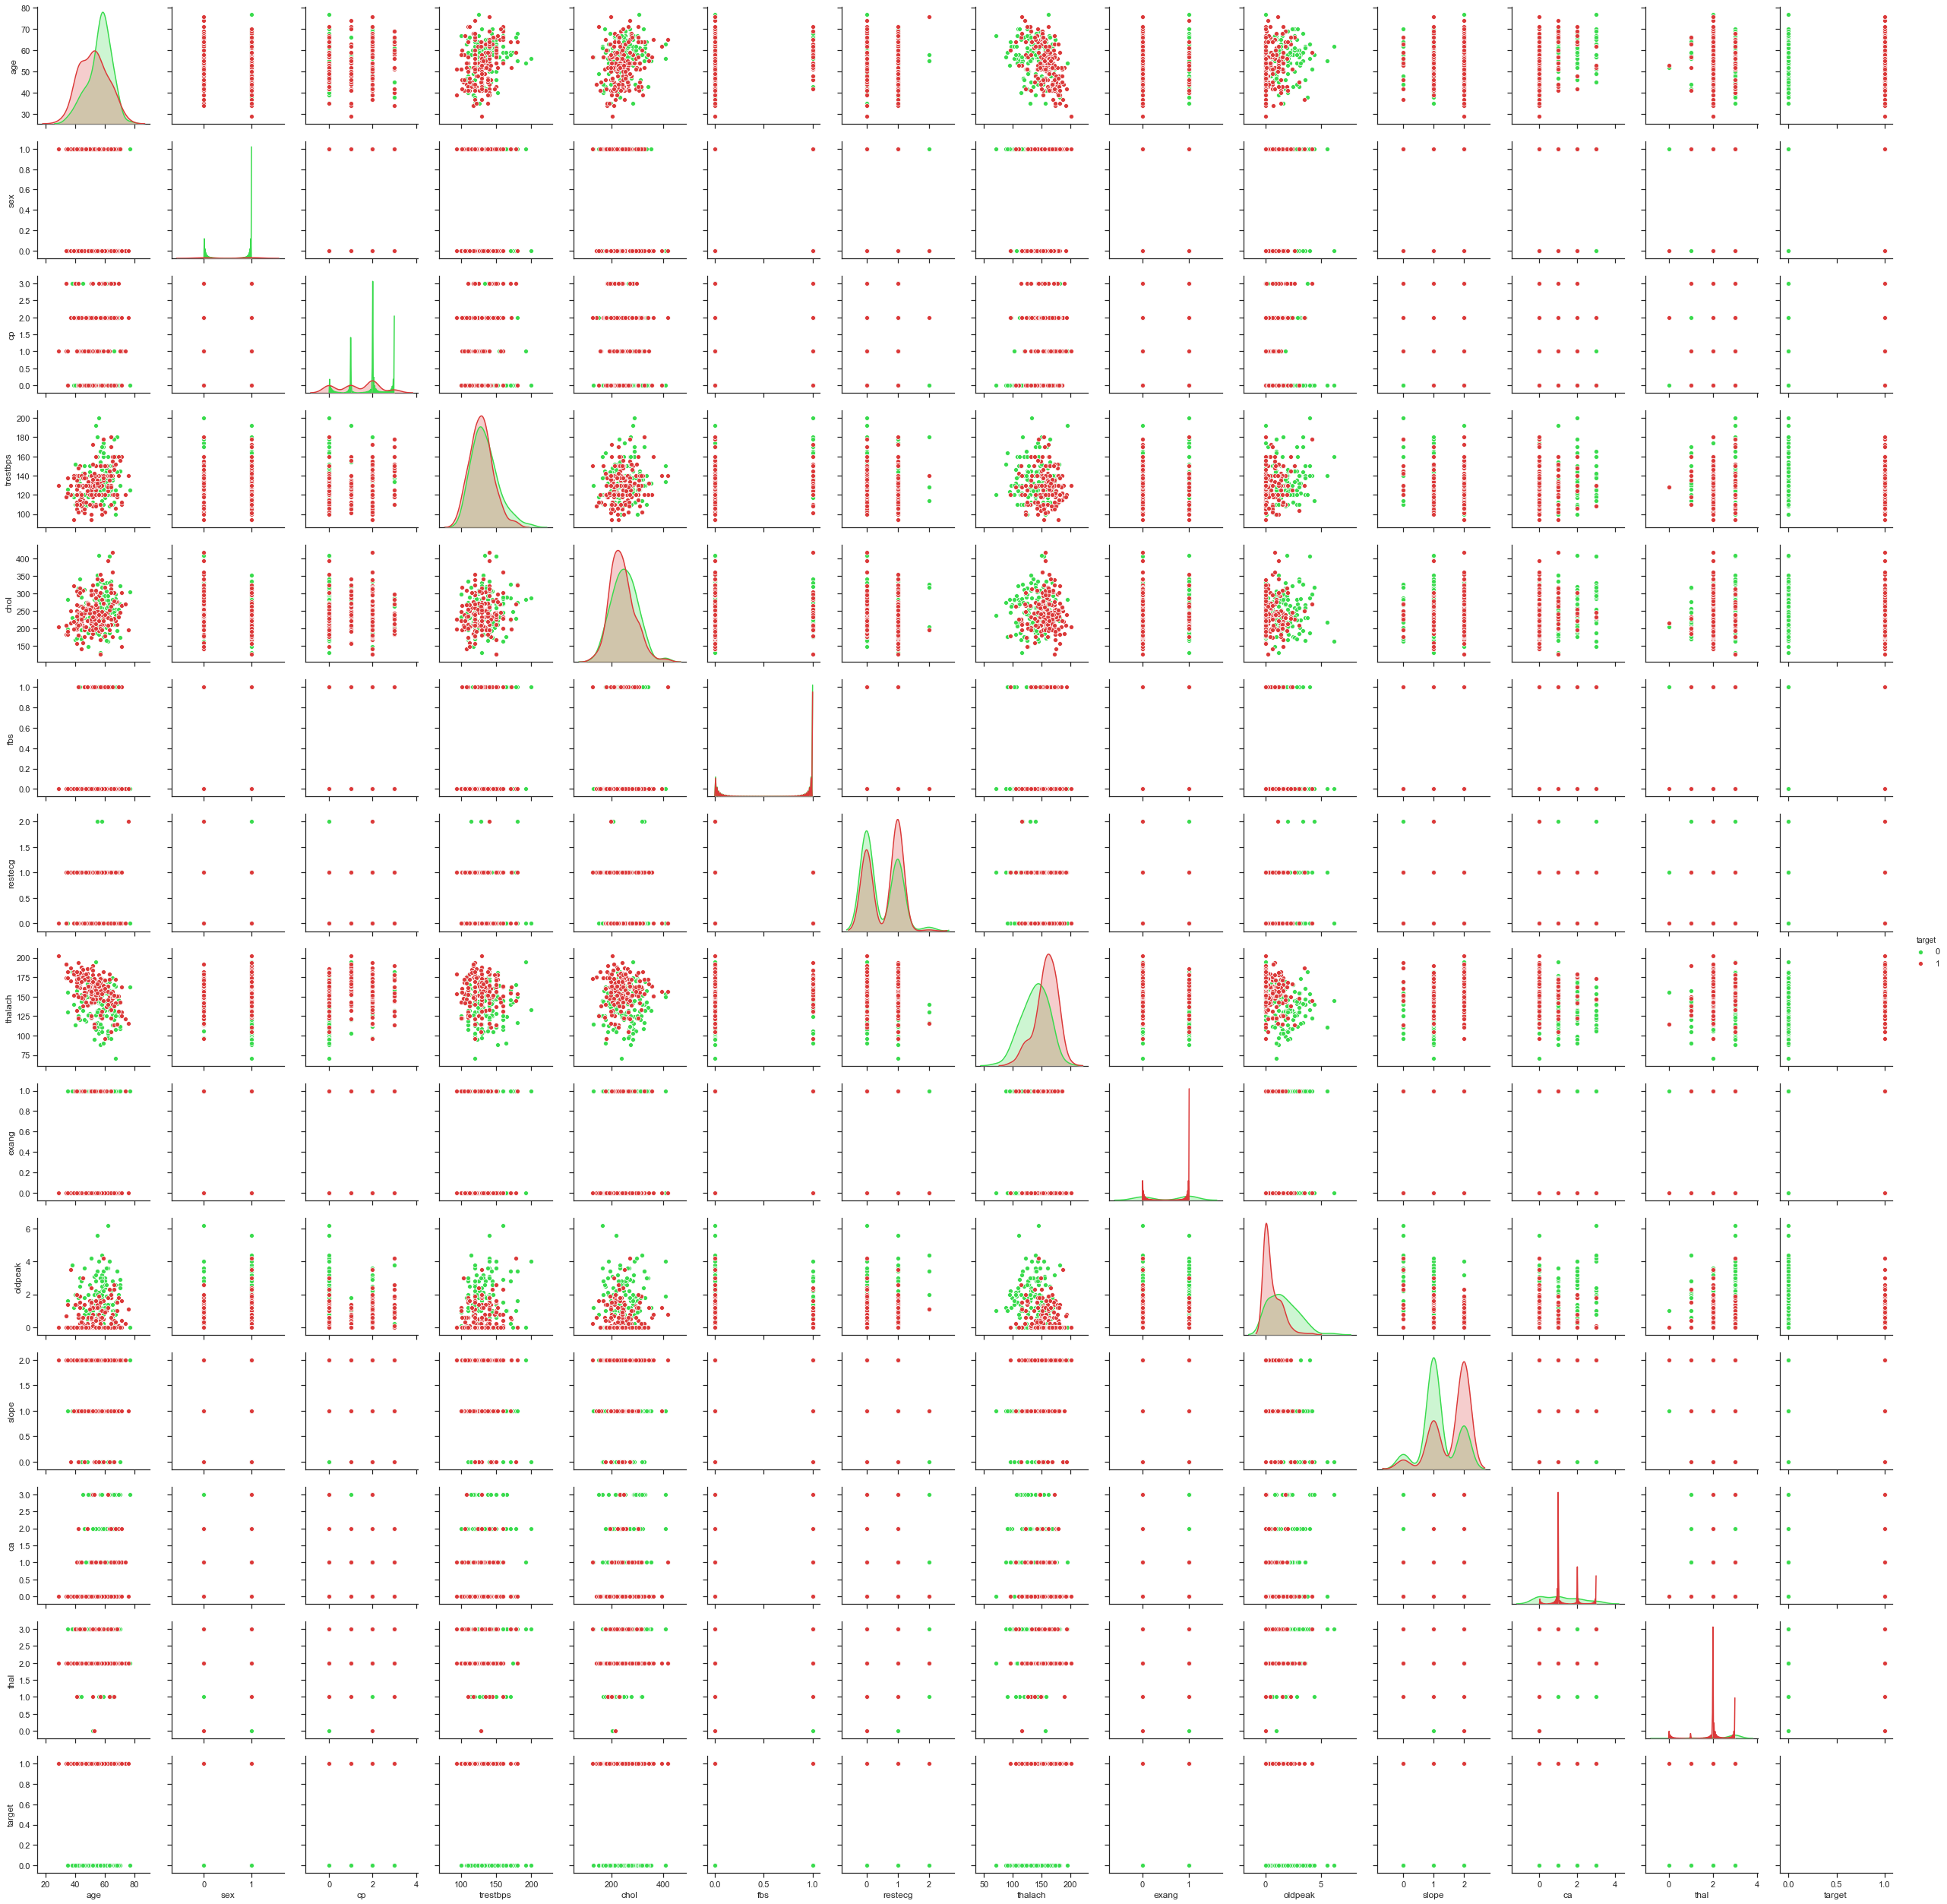

In [118]:
# pairplot
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.pairplot(heart_df_new, hue='target')
plt.show();

- Conclusions:
  - Pairplot allows us to take in a huge amount of data and see any relationships and the spread of each data point by using each numerical column, put them on both the x and y axes, then plot a a scatter plot where they meet. Where the same variables meet, a histogram depicted that shows the distribution of the variables.
  

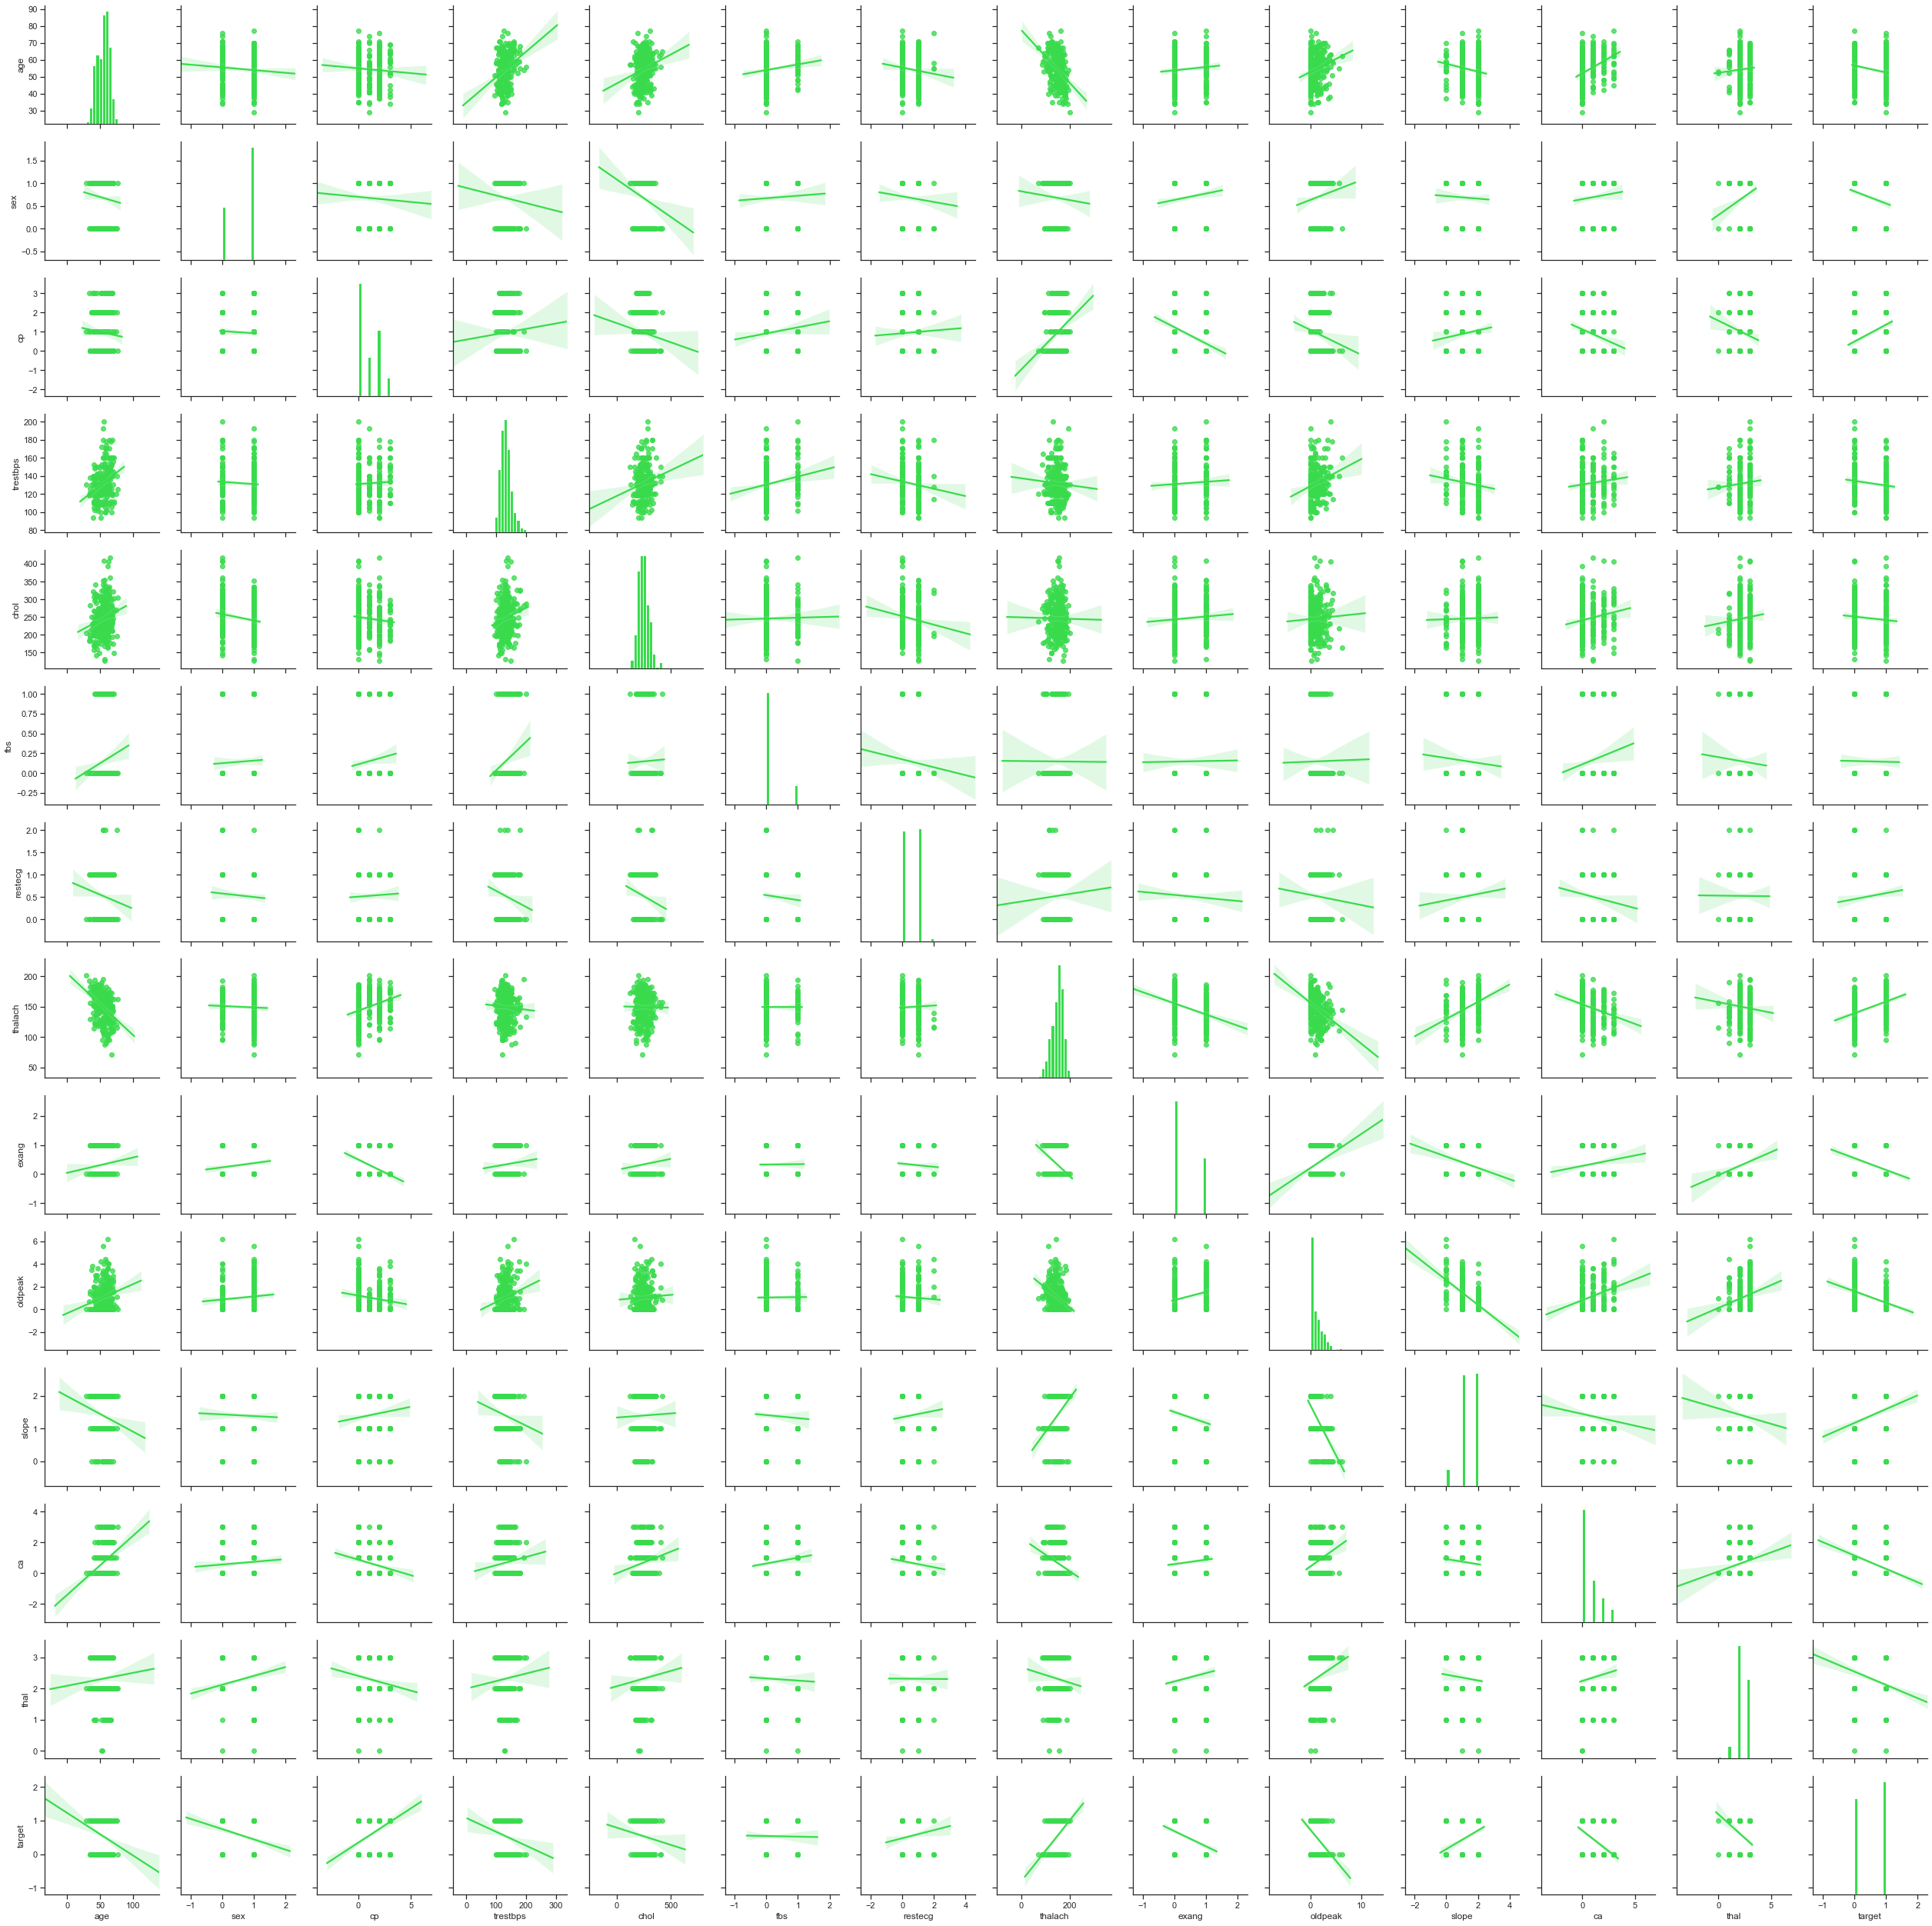

In [119]:
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.pairplot(heart_df_new, kind="reg")
plt.show()

- Conclusions:
  - Pairplot allows us to take in a huge amount of data and see any relationships and the spread of each data point by using each numerical column, put them on both the x and y axes, then plot a a scatter plot where they meet. Where the same variables meet, a histogram depicted that shows the distribution of the variables. Interestingly, when I added the regression feature to pairplot code, I noticed the slope direction agrees with the heatmap conclusions when comparing all the rows of y-axis to target column on x -axis.

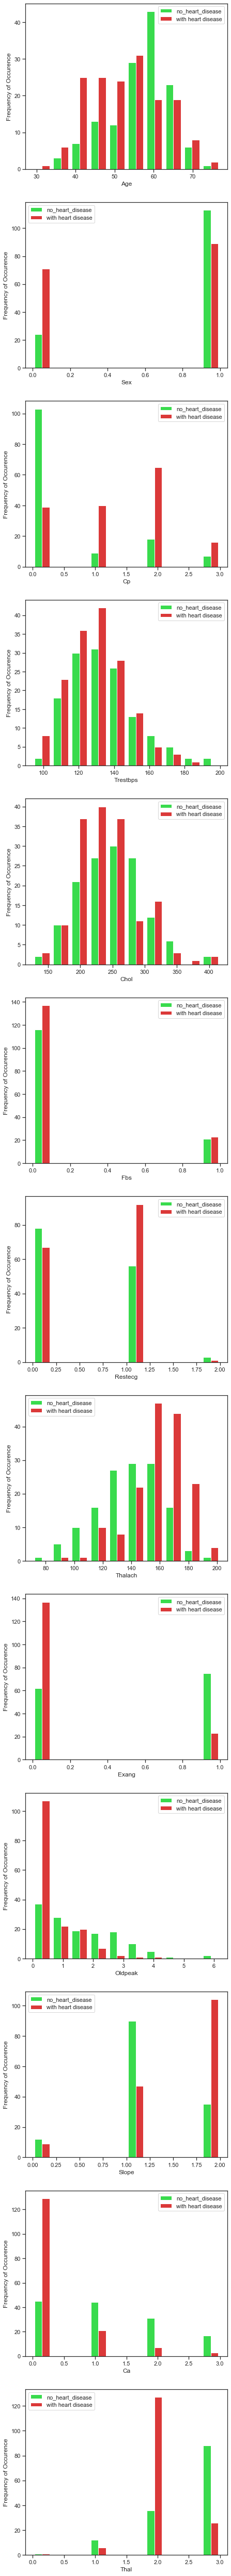

In [120]:
f,axes=plt.subplots(13,1,figsize=(7,91))

for ii,ax in enumerate(axes):
    ax.hist([heart_df_new[heart_df_new.columns[ii]][heart_df_new.target==0],heart_df_new[heart_df_new.columns[ii]][heart_df_new.target==1]],
            label=["no_heart_disease","with heart disease"])
    ax.set_xlabel(heart_df_new.columns[ii].title())
    ax.set_ylabel("Frequency of Occurence")
    ax.legend()

# <b>My Observation Conclusions </b> 


 
- A. <a href='age :'> age :</a>		 Most people suffering heart attacks are between the age of 50 and 60. The mean age of a person who got a heart attack was 54.4. It appears that heart disease steadily increases with age up to 60. Then patients older than 60 observe a steady and gradual decrease in heart disease. After age 65, there is a steady and steep decrease in heart disease patients. Patients with no heart disease appears to follow the same pattern as those with heart disease.

- B. <a href='age :'> sex :</a>	 	Men suffer from heart attacks significantly more often than women. In fact the percentage of men suffering from a heart attack in this dataset was calculated to be 68% while the percentage of women suffering from a heart attack was seen to be 32%.

- C. <a href='age :'> cp :</a>	Most of the people who had a heart attack suffered from level 0 chest pains prior to the attack. Patents’ with increased chest pain level are  more likely to have heart disease. Patients without heart disease are less likely to have the same chest pain level.

- D. <a href='age :'> trestbps:</a> Resting blood pressure most frequently seen in patients prior to admission lies between 120 and 140. The mean resting blood pressure was 131. Feature distribution appears to similar between patients with and without heart disease.

- E. <a href='age :'> chol :</a>	  A healthy cholesterol level in most humans is less than 200. From this graph we learn that people with heart disease have significantly higher cholesterol than average humans. The mean cholesterol level in this data set is 246.3. The lowest cholesterol level was 126 while the highest was seen to be 564. Since there is only a single case of the max cholesterol, it may be an anomaly. Feature distribution appears to similar between patients with and without heart disease.

- F. <a href='age :'> fbs :</a>	 Most of the people in this data set had a fasting blood sugar level less than 120mg/dL, this feature doesn’t appear to have an impact in identifying heart disease. Feature distribution appears to similar between patients with and without heart disease.

- G. <a href='age :'> restecg :</a>	 Patients with heart disease had a higher resting electrocardiographic measurement indicating having a defined as having ST-T wave abnormality, whereas non-heart disease patients did not have the ST-T wave abnormality.
        
- H. <a href='age :'> thalach :</a>	 The maximum heart rate achieved for most patients was about 160, with the average being 150. Maximum heart rate achieved is on average 20-30 beats per minute higher for heart disease patients that patients without heart disease.

- I. <a href='age :'> exang :</a>	 Exercise induced angina appears to occur most frequently in heart disease patients.

- J. <a href='age :'> oldpeak :</a>		 Both heart disease and non-heart disease patient populations decrease as oldpeak increases from zero to six. However, patients with heart disease have a much larger population at zero oldpeak value. 

- K. <a href='age :'> slope :</a>	 Heart disease patient population increased with increasing slope values (from 0 to 2), whereas, non-heart disease patient population is maximum at slope value of 2.

- L. <a href='age :'> ca :</a>	Both heart disease and non-heart disease patients show lower populations as the number of visible blood vessels increased. However, heart disease patients showed a negative gradient in comparison to the non-heart disease patients. One possible explanation is that the  non-heart disease patients have more visible blood vessels.

- M. <a href='age :'> tha :</a> Heart disease patients had a thalassemia score of 2, possibly indicating a fixed defect, whereas, non-heart disease patients  had a score of 3 which is representative of a reversable defect.






# Overall EDA Conclusions
  - Based on the above analyses, the features I would like to evaluate further in my modeling notebook are cp, thalach, and slope. I am also interested in seeing if the features with a negative correlation with the target value remain negative when I evaluate them in my modeling notebook, which includes the features exang, oldpeak, ca, and thal.    